In [23]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
from NeuralNetwork import NeuralNetwork
import torch
import torch.nn as nn
from torch.distributions import Categorical

In [24]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1
adversaryProbs[1]=0
adversaryProbs[2]=0
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25, adversaryProbs=adversaryProbs)
adversaryProbs

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
game.reset()

(tensor([  0.0000, 200.0000, 128.5000]), 0, False)

In [26]:
game.adversaryChoosePrice()

135.5

In [27]:


# Hyperparameters
# def NeuralNetwork():
#     lr = .000001
#     num_actions = 50

#     nn_ = 100

#     policy = nn.Sequential(
#                            nn.Linear(2, nn_), 
#                            nn.ReLU(),
#                            nn.Linear(nn_,nn_),
#                            nn.ReLU(),
#                            nn.Linear(nn_,num_actions),                       
#                            nn.Softmax(dim=0))
#     optim = torch.optim.Adam(policy.parameters(), lr=lr)

#     return policy, optim


In [28]:

# lr = .000001
# num_actions = 50

# nn_ = 100

# policy = nn.Sequential(
#                        nn.Linear(2, nn_), 
#                        nn.ReLU(),
#                        nn.Linear(nn_,nn_),
#                        nn.ReLU(),
#                        nn.Linear(nn_,num_actions),                       
#                        nn.Softmax(dim=0))
# optim = torch.optim.Adam(policy.parameters(), lr=lr)

# policy


In [29]:
neuralNet=NeuralNetwork()
algorithm = ReinforceAlgorithm(game, neuralNet, numberIterations=1, numberEpisodes=50_000, discountFactor =0.9)

0


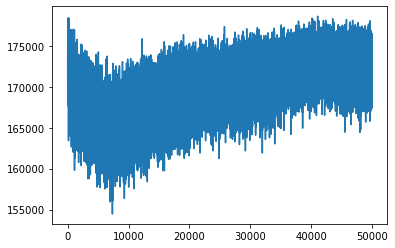

In [30]:
algorithm.solver()

In [31]:
name=f"nn, ep={algorithm.numberEpisodes}"
neuralNet.save(name=name)

In [32]:
neuralNet.load(name=name)

In [33]:
algorithm.bestAverageRetu

169891.223680011

In [34]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T
learning = pd.DataFrame(algorithm.returns.mean(axis = 0),columns=['entry'])

,0,1
0,200.000000,200.000000
1,227.500000,172.500000
2,227.250000,172.750000
3,236.125000,163.875000
4,234.562500,165.437500
5,241.781250,158.218750
6,242.890625,157.109375
7,246.445312,153.554688
8,245.722656,154.277344
9,245.361328,154.638672


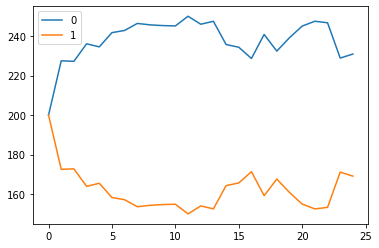

In [35]:
demandPotential.plot()
demandPotential

In [36]:
profits.sum(axis=0)

0    174242.480872
1     52579.878856
dtype: float64

,0,1
0,2808.250000,4160.250000
1,6867.562500,2575.562500
2,5802.265625,2588.265625
3,7345.441406,2156.441406
4,6118.110352,2229.610352
5,7167.027588,1901.777588
6,6789.831116,1853.706116
7,7528.381607,1703.819107
8,7460.060246,1733.778996
9,7425.997483,1748.856858


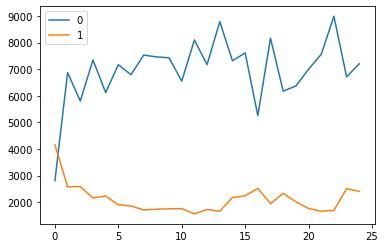

In [37]:
profits.plot()
profits


,0,1
0,80.500000,135.500000
1,122.250000,121.750000
2,104.125000,121.875000
3,120.562500,117.437500
4,103.781250,118.218750
5,112.390625,114.609375
6,106.945312,114.054688
7,113.722656,112.277344
8,113.361328,112.638672
9,113.180664,112.819336


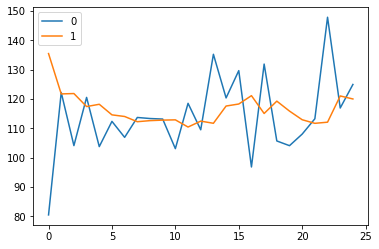

In [38]:
prices.plot()
prices

<AxesSubplot:>

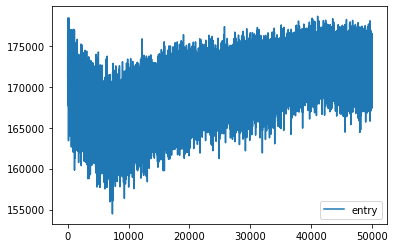

In [39]:
learning.plot()

In [40]:
# pricelearning = pd.DataFrame(game.prices.mean(axis = 0))
# pricelearning.plot()

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
learning = learning.to_numpy()
learning_2 = [0]*len(learning)
for i in range(len(learning)):
    learning_2[i] = learning[i][0]

In [43]:
avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

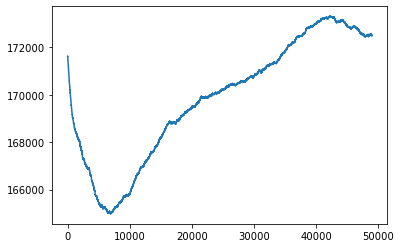

In [44]:
plt.plot(avg_learning)
plt.show()